In [1]:
!git lfs install
!git clone https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5

git: 'lfs' is not a git command. See 'git --help'.

The most similar command is
	log
Cloning into 'stable-diffusion-v1-5'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48 (from 1)
Unpacking objects: 100% (48/48), 526.17 KiB | 6.92 MiB/s, done.


In [3]:
from diffusers import DiffusionPipeline
# pipeline = DiffusionPipeline.from_pretrained("./stable-diffusion-v1-5", use_safetensors=True)

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

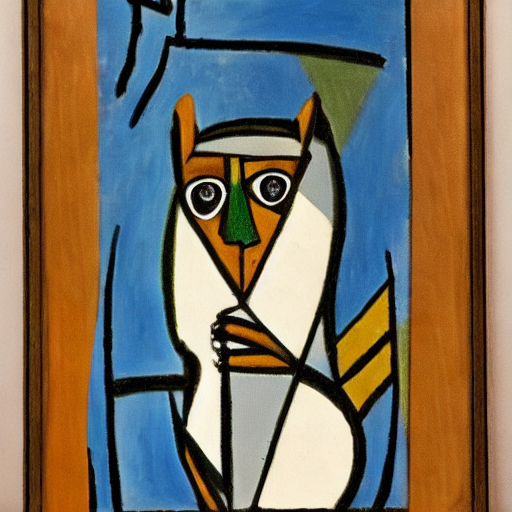

In [16]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

In [18]:
from diffusers import EulerDiscreteScheduler
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

  0%|          | 0/50 [00:00<?, ?it/s]

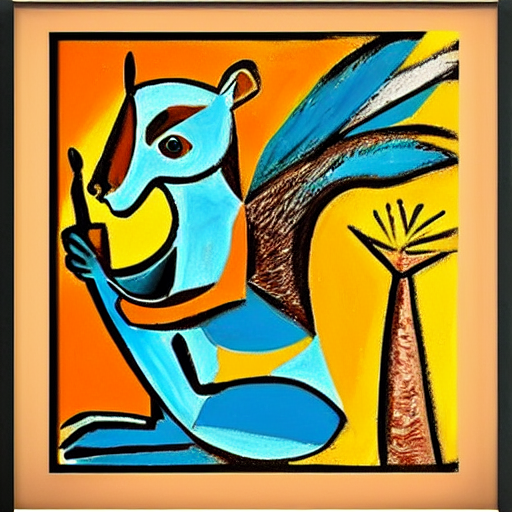

In [32]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

In [51]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

In [52]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('time_embedding_dim', None),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('mid_block_type', 'UNetMidBlock2D'),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
   

In [80]:
import torch

torch.manual_seed(1)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape
torch.Size([1, 3, 256, 256])

torch.Size([1, 3, 256, 256])

In [81]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.34.0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [82]:
# scheduler.config.num_train_timesteps = 1

In [83]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample
noisy_residual = noisy_residual.to("cuda")

In [84]:
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=800, sample=noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

'Image at step 1'

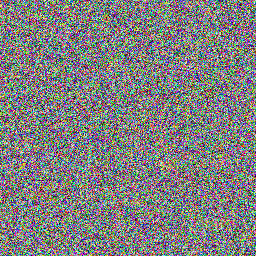

In [85]:
display_sample(less_noisy_sample, 1)

In [86]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

  5%|███▊                                                                             | 47/1000 [00:01<00:23, 40.42it/s]

'Image at step 50'

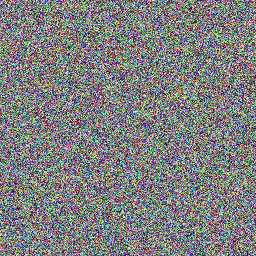

 10%|███████▊                                                                         | 97/1000 [00:02<00:22, 40.44it/s]

'Image at step 100'

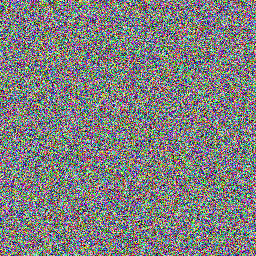

 15%|███████████▊                                                                    | 147/1000 [00:03<00:21, 40.45it/s]

'Image at step 150'

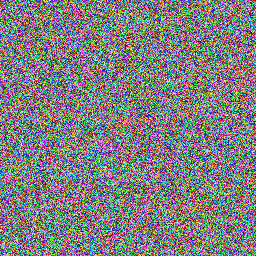

 20%|███████████████▉                                                                | 199/1000 [00:04<00:14, 55.58it/s]

'Image at step 200'

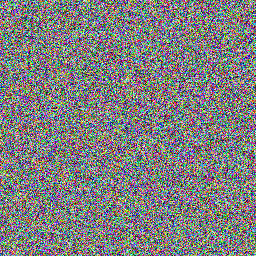

 25%|███████████████████▊                                                            | 247/1000 [00:05<00:12, 60.04it/s]

'Image at step 250'

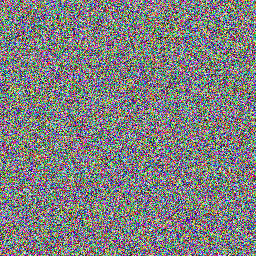

 30%|███████████████████████▌                                                        | 295/1000 [00:06<00:11, 60.11it/s]

'Image at step 300'

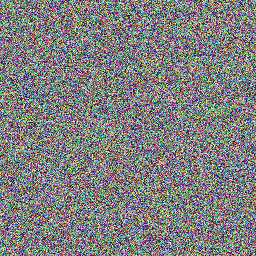

 34%|███████████████████████████▌                                                    | 344/1000 [00:07<00:10, 60.22it/s]

'Image at step 350'

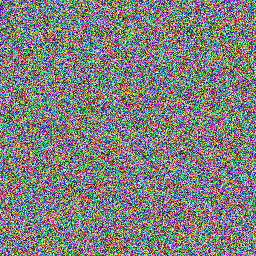

 39%|███████████████████████████████▍                                                | 393/1000 [00:08<00:10, 60.42it/s]

'Image at step 400'

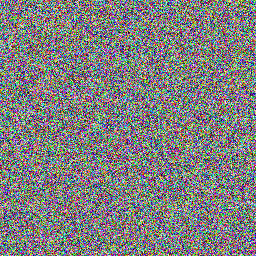

 45%|███████████████████████████████████▉                                            | 449/1000 [00:09<00:09, 60.39it/s]

'Image at step 450'

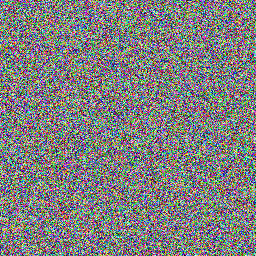

 50%|███████████████████████████████████████▊                                        | 498/1000 [00:09<00:08, 60.35it/s]

'Image at step 500'

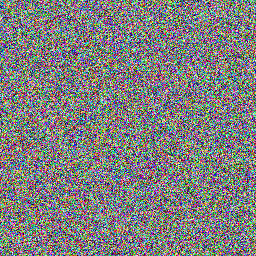

 55%|███████████████████████████████████████████▊                                    | 548/1000 [00:11<00:10, 41.46it/s]

'Image at step 550'

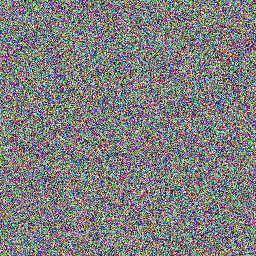

 60%|███████████████████████████████████████████████▊                                | 598/1000 [00:12<00:09, 40.44it/s]

'Image at step 600'

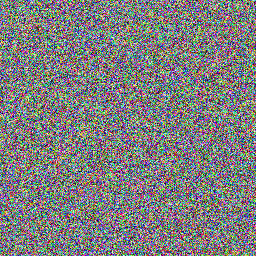

 65%|███████████████████████████████████████████████████▉                            | 649/1000 [00:13<00:08, 43.66it/s]

'Image at step 650'

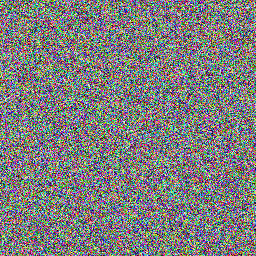

 70%|███████████████████████████████████████████████████████▋                        | 696/1000 [00:14<00:05, 58.38it/s]

'Image at step 700'

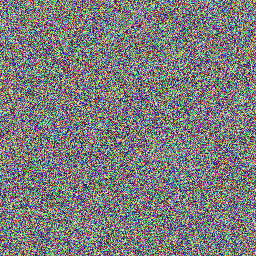

 74%|███████████████████████████████████████████████████████████▍                    | 743/1000 [00:15<00:04, 59.44it/s]

'Image at step 750'

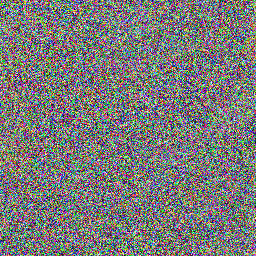

 80%|███████████████████████████████████████████████████████████████▊                | 797/1000 [00:16<00:04, 40.91it/s]

'Image at step 800'

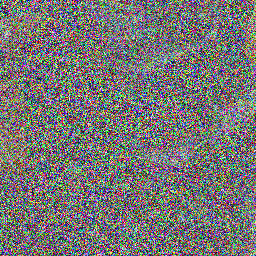

 85%|███████████████████████████████████████████████████████████████████▊            | 847/1000 [00:17<00:03, 40.10it/s]

'Image at step 850'

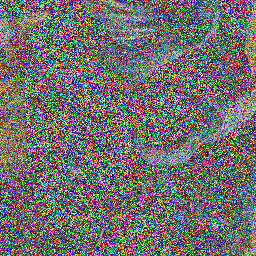

 90%|███████████████████████████████████████████████████████████████████████▉        | 899/1000 [00:18<00:01, 57.84it/s]

'Image at step 900'

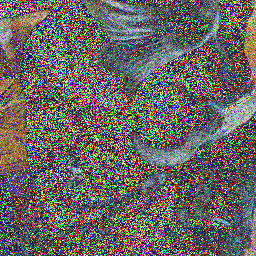

 95%|███████████████████████████████████████████████████████████████████████████▊    | 947/1000 [00:19<00:00, 59.72it/s]

'Image at step 950'

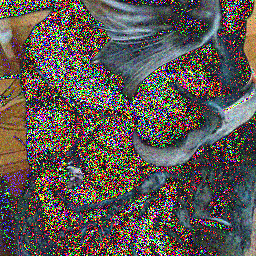

100%|███████████████████████████████████████████████████████████████████████████████▌| 995/1000 [00:20<00:00, 59.87it/s]

'Image at step 1000'

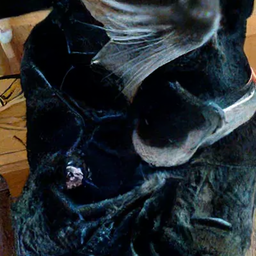

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.62it/s]


In [87]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)